<a href="https://colab.research.google.com/github/gopaljigupta45/Gopal-Ji-Gupta-EDA-Hotel-Booking/blob/main/GOPAL_JI_GUPTA_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Importing the libraries and tools that we'll need.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Importing the relavent dataset.
file_path = "/content/drive/MyDrive/ALMABETTER DATA SCIENCE MATERIALS/Module 1 - Python/EDA Capstone Project - Hotel Booking Analysis/dat/Hotel Bookings.csv"
df = pd.read_csv(file_path)

In [9]:
# Checking how the dataframe looks.
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [10]:
# Getting the information about the entries in the dataframe - their dtypes and no. of null values, columns etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
# Let's create a copy of this dataframe so as to keep it preserved before we operate on it.
new_df = df.copy()

In [12]:
# Let's see if there are any duplicate values in our dataframe.
df[df.duplicated()]
# So indeed, below are the duplicated rows.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,1,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,0.0,0,HB,ROU,Direct,Direct,0,0,0,E,E,0,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,97.00,0,0,Canceled,2015-07-01
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,109.80,0,3,Check-Out,2015-07-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Check-Out,2017-09-03
119352,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,0.0,0,BB,SWE,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03


In [13]:
# Let's drop these duplicate values from our dataframe. Which will make it easier to operate on.
df.drop_duplicates(inplace=True)

In [14]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [15]:
# This shortens our dataset significantly.
# Now let's check if there are null values in our df.
df.isna().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [16]:
# So we see that just the two columns in our df account for most of the null values and only 4 columns have null values.
# We need to be vary when operating on these 4 columns.


Text(0.5, 1.0, 'Number of bookings for each Hotel')

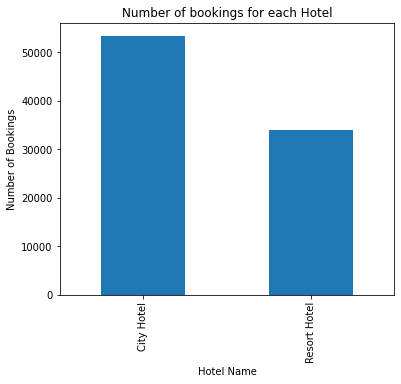

In [33]:
# Let's find out which hotel has more number of bookings and represent it by means of a bar chart.
plt.rcParams['figure.figsize'] = (6,5)
df['hotel'].value_counts().plot.bar()
plt.xlabel('Hotel Name')
plt.ylabel('Number of Bookings')
plt.title('Number of bookings for each Hotel')

 **First objective: Let's find out what the best time is for booking a hotel room?
And also find out which is the busiest month of the Hotel?**

To solve this, we will take a look at the monthly booking data for both hotels combined and specifically as well as the time gap between the time of booking and the time of arrival(Lead Time).

In [18]:
# Getting the monthly booking data for each hotel as well as the combined stats.

# Using Groupby to get data for specific hotels. And using unstack function to get extensive details that we store in another dataframe.

# Also Creating a transpose so we get our information column-wise. It also makes it easier to plot and read.
monthly_hotelwise_df = df.groupby('hotel')['arrival_date_month'].value_counts().unstack().T

# Reseting the index of our new dataframe inplace.
monthly_hotelwise_df.reset_index(inplace=True)
# Let's see what this df looks like.
monthly_hotelwise_df.head()

hotel,arrival_date_month,City Hotel,Resort Hotel
0,April,5080,2828
1,August,6591,4666
2,December,3014,2117
3,February,3605,2493
4,January,2730,1963


We can see that in the above dataframe, months are not in proper chronological order(as they appear in the calender). So we need to do Sorting to get the months in order.   
We do this by creating a dict which initially has the months in chronological order as keys and zeros as values for every key.

Then we iterate over the dataframe and for every month, we take the corresponding values from the dataframe and add them to the 
Dict as values for their respective keys. 

So we get a dictionary which contains the same information as our dataframe with the months in chronological order as output.
Then we convert it to a dataframe using from_dict function and plot it.



Text(0.5, 1.0, 'Monthly Booking Data')

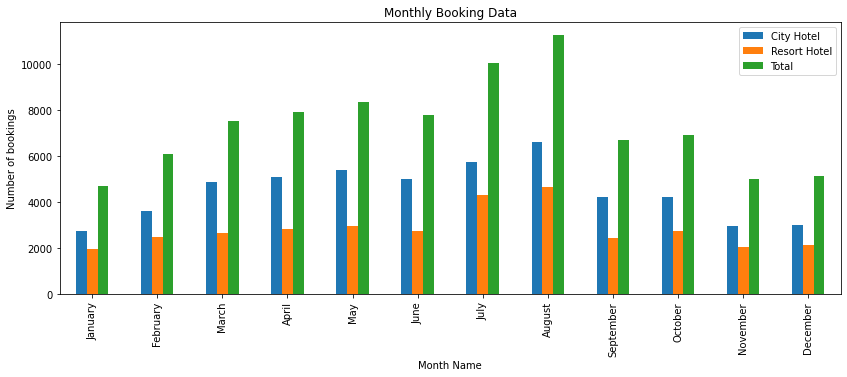

In [42]:
# Creating a dict which initially has the months in chronological order as keys and zeros as values for every key.
# We do this by creating two lists - one for months and one which has zeros and then we zip them.
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
zero_list = [0 for i in range(0,len(month_list))]

# Now we zip them to form a dict.
month_dict = dict(zip(month_list,zero_list))

# Then we iterate over the dict keys and dataframe and for every month, we take the corresponding values from the dataframe and add them 
# to the dict as values for their respective keys.
for i in month_dict.keys():
  for index,row in monthly_hotelwise_df.iterrows():
    if i==row['arrival_date_month']:
      month_dict[row['arrival_date_month']] = (row['City Hotel'],row['Resort Hotel'])

# Setting the figsize of our chart accordingly using plt.rcParams function 
plt.rcParams['figure.figsize'] = (14,5)

# Now converting the dict to dataframe. Since we reset index earlier, we need to rename the columns with hotel names.
sorted_monthly_df = pd.DataFrame.from_dict(month_dict, orient='Index').rename(columns={0:'City Hotel',1:'Resort Hotel'})

# Adding a new column which has total no. of bookings for both hotels combined. We do this by simply adding the two columns.
sorted_monthly_df['Total'] = sorted_monthly_df['City Hotel'] + sorted_monthly_df['Resort Hotel']

# Now we plot this dataframe using a bar chart.
sorted_monthly_df.plot.bar()

# Now changing the title and x and y labels.
plt.xlabel('Month Name')
plt.ylabel('Number of bookings')
plt.title('Monthly Booking Data')

Text(0.5, 1.0, 'Monthly Lead Time Data for both Hotels')

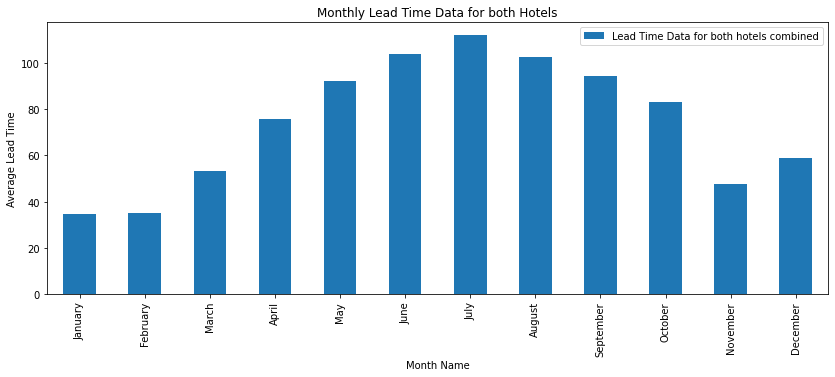

In [48]:
# Now looking at the average Lead time for each month. 
monthly_lead_time_df = df.groupby('arrival_date_month')['lead_time'].mean().reset_index()

# Again we will need to do sorting by month using the same approach.
# creating another dict of month names and zeros.
lead_sample_dict = dict(zip(month_list,zero_list))     # We will use the same lists of month names and zeros.

# Then we iterate over the dict keys and dataframe and for every month, we take the corresponding values from the dataframe and add them 
# to the dict as values for their respective keys.
for i in lead_sample_dict.keys():
  for index,row in monthly_lead_time_df.iterrows():
    if i in row['arrival_date_month']:
      lead_sample_dict[i]+=row['lead_time']

# So we get a dictionary which contains the same information as our dataframe with the months in chronological order as output.
# Now we convert our dict to a dataframe using from_dict function and plot it. Also we rename the column as it has zero as it's label.
pd.DataFrame.from_dict(lead_sample_dict, orient='index').rename(columns={0:'Lead Time Data for both hotels combined'}).plot.bar()

# Also changing the title name and x and y labels to make the graph more understandable.
plt.xlabel('Month Name')
plt.ylabel('Average Lead Time')
plt.title('Monthly Lead Time Data for both Hotels')

**Conclusions Drawn**

From the graphs displayed above, we can answer with certainity that ***August is the busiest month*** for the hotels. This is evident when we look at monthly bookings graph. Both the hotels have highest number of bookings in August and the overall bookings also are highest in the Month of August.

Now to determine when is the best time to book a hotel, we need to factor in a few things. The best time to make a booking would really depend on the purpose behind it. For example if the reason behind your booking is to visit Manali, you'd like to go there in snow season. But if you want to visit the Taj Mahal, you can do that anytime and it won't make a difference.So the purpose behind the booking matters.

So as we mentioned, August is the busiest time of the year. Everyone is trying to make a booking in August despite a big lead time (Time gap between the time of booking and arrival). This, may be because of the wonderful Autumn weather which would also explain the increase in booking numbers during spring season i.e. from March to May as compared to before and after spring season. On the basis of this assumption, ***August is the best time to book a hotel.***

However that also means that availability of the rooms would be an issue. And as we can see in the lead time chart, lead time is also highest for the months of July and August. ***So if we look at things from the point of view of availability of rooms and comfort, best time to make the booking will be in the month of January.*** As it has the least number of bookings and lead time is also the lowest.



 
